In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
import matplotlib.pyplot as plt


# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

In [2]:
data = pd.read_csv('case1Data.csv')
y = data['y']
X = data.drop('y', axis=1)
# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

In [4]:
# impute missing values with mean
X_imputed_mean = X.fillna(X.mean())

# check if there are any columns with zero variance
variance = np.var(X_imputed_mean, axis=0)
zero_var_cols = np.where(variance == 0)[0]
print('Zero variance columns:', zero_var_cols)

# drop columns with zero variance
X_imputed_mean = X_imputed_mean.drop(X_imputed_mean.columns[zero_var_cols], axis=1)
print('Columns dropped:', X.columns[zero_var_cols])

# devide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_mean, y, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train_standardardized = scaler.fit_transform(X_train)
X_test_standardardized = scaler.transform(X_test)

X_standardized = scaler.fit_transform(X_imputed_mean)

Zero variance columns: [96]
Columns dropped: Index(['C_02'], dtype='object')


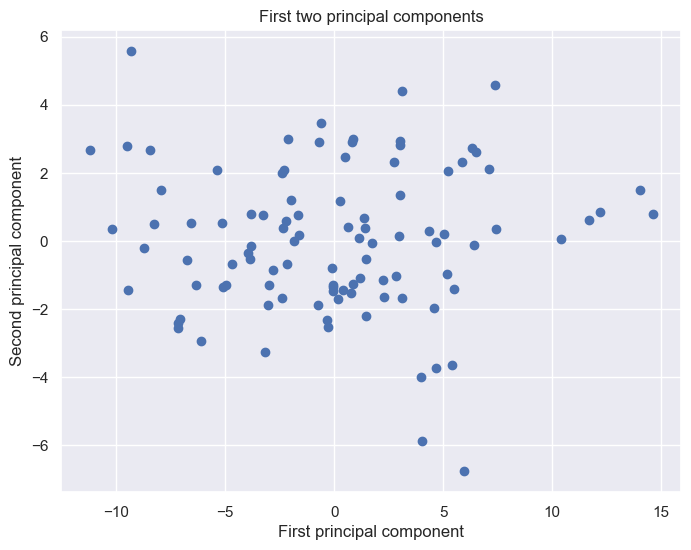

In [6]:
# perform PCA on X_standardized
U, S, Vt = lng.svd(X_standardized, full_matrices=False)
V = Vt.T
Z = X_standardized @ V

# plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('First two principal components')
plt.grid(True)
plt.show()

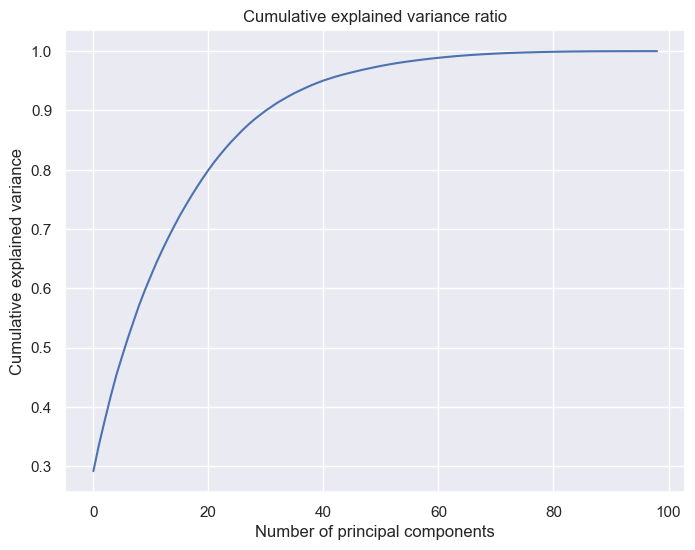

In [7]:
#plot the explained variance
explained_variance = np.var(Z, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance_ratio)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance ratio')
plt.grid(True)
plt.show()

In [9]:
# save the principal components to a csv file with y
principal_components = pd.DataFrame(Z, columns = [f'{i}' for i in range(1, p)])
principal_components['y'] = y
principal_components.to_csv('pca_data.csv', index=False)